#                                     CIS 731 HW-0 Abhiraj Singh 

In [17]:
#import the libraries required for the tasks

import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.callbacks import History
from collections import Iterable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
#to load and run the dataset locally
 
df = pd.read_excel('Concrete_Data.xls',header=0)
print(df.shape)
df.head(5)

(1030, 9)


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [19]:
#check for any NA values

lst = df.columns
def count_na(x):    
    for i in lst:
        return df[x].isnull().any()
obj1 = count_na(lst)
obj1

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

In [20]:
#statistical measures
 
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [21]:
#to check the type of the data present

dtyp = df.dtypes
print(dtyp)

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object


In [22]:
#Splitting into X and Y i.e. input and output variables respectively
x = df.loc[:,'Cement (component 1)(kg in a m^3 mixture)':'Age (day)']
y = df.iloc[:,8]

In [23]:
#normalizing the dataset 
sc = StandardScaler()
x = sc.fit_transform(x)

In [24]:
#splitling the dataset into train and validation set
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.30, random_state=8)

In [25]:
x_train.shape[0]

721

In [31]:
#create a d-2d-1 neural network with sigmoid activation function

model = Sequential()
model.add(Dense(16, input_dim = 8, activation = 'sigmoid'))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='sgd')

In [32]:
history = History()
model.fit(x_train, y_train, batch_size=721, epochs=50, verbose=0, callbacks=[history],validation_data=(x_val,y_val))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 17        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________
None


In [33]:
#extract weights(learned parameters) from the neural network
 
for layer in model.layers:
    weights = layer.get_weights()
print(weights)

[array([[3.778244 ],
       [3.2420502],
       [2.8245192],
       [4.1830063],
       [4.3682437],
       [3.3090396],
       [2.3133166],
       [3.3640919],
       [3.2500153],
       [2.1086981],
       [3.0662732],
       [3.2575452],
       [3.149068 ],
       [2.8760395],
       [3.552346 ],
       [3.804285 ]], dtype=float32), array([4.8773518], dtype=float32)]


In [34]:
#collect mse of the training and the vaidation set

train_mse = history.history.get('loss')
val_mse = history.history.get('val_loss')
print(len(train_mse))
print(train_mse)
print(len(val_mse))
print(val_mse)

50
[1552.5540771484375, 1313.006103515625, 1111.6226806640625, 933.3976440429688, 773.5911865234375, 632.6285400390625, 512.7709350585938, 415.6956787109375, 341.0388488769531, 286.1000671386719, 246.70692443847656, 218.53289794921875, 197.99571228027344, 182.51800537109375, 170.4017791748047, 160.581787109375, 152.40191650390625, 145.4534454345703, 139.47132873535156, 134.27398681640625, 129.72866821289062, 125.73309326171875, 122.20500946044922, 119.07669830322266, 116.29148864746094, 113.80159759521484, 111.56649017333984, 109.55171966552734, 107.7280502319336, 106.07054138183594, 104.55796813964844, 103.17214965820312, 101.89761352539062, 100.7210922241211, 99.63116455078125, 98.61811065673828, 97.6734390258789, 96.7899398803711, 95.96126556396484, 95.18199920654297, 94.44731903076172, 93.75312042236328, 93.09571838378906, 92.4719009399414, 91.87886047363281, 91.31402587890625, 90.77511596679688, 90.2601318359375, 89.76720428466797, 89.29475402832031]
50
[1344.521484375, 1138.48608

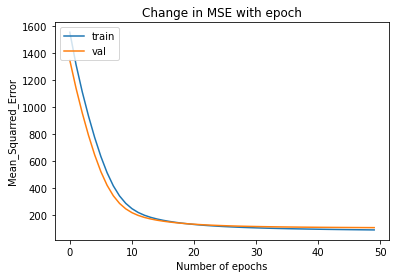

In [35]:
#plot the MSE scores of the training set and the validation set with change in weight

plt.plot(train_mse)
plt.plot(val_mse)
plt.xlabel('Number of epochs')
plt.ylabel('Mean_Squarred_Error')
plt.title('Change in MSE with epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Conclusion: Based on the above plot we can see that the as the number of epochs increase, the model's error value decreases in both train and validation set. This shows that with every epoch the network learned new patterns in data and becomes efficient until it reaches it's saturation point. 

References: https://www.tensorflow.org/api_docs/python/tf/keras/losses/MSE


            https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength